# Ритейл — Анализ программы лояльности


## Материалы
<a id=material></a>

* [Презентация](https://drive.google.com/file/d/1ivpInbFpr6FPUCQnKsZjDcgs0E7gk9Mj/view?usp=sharing)
* [Дашборд](https://public.tableau.com/views/Project_16537634492950/Dashboard1?:language=enUS&publish=yes&:display_count=n&:origin=viz_share_link)


#### Описание данных:

Датасет содержит данные о покупках в магазине строительных материалов «Строили, строили и наконец построили».
Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Файл retail_dataset.csv:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

Файл product_codes.csv:

- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;


**Цель исследования** - провести анализ программы лояльности сети строительных материалов «Строили, строили и наконец построили». Определить эффективность программы лояльности как для отдельных магазинов,так и для всей сети. Сформировать рекомендации по действующей программе лояльности (при необходимости).

**Ход исследования** - мы получили информацию о совершенных покупках из файла retail_dataset.csv и сведения о стоимости товара из файла product_codes.csv, о качестве данных ничего неизвестно, поэтому на **первом этапе** следует выполнить предобработку данных и выявить наличие пропущенных значений, дубликатов, проверить корректность в наименовании столбцов, соответствие типов данных, объединить таблицы о покупках и товарах. На **втором этапе** следует выполнить исследовательский анализ данных,а именно:

- определить период за который предоставлена информация;
- определить количество покупателей;
- определить сколько всего было произведено покупок;
- проанализировать стоимость чека и принять решение об исключении аномалий;
- скорректировать предварительно выдвинутые гипотезы (при необходимости);
- определить недостающие расчетные значения, требуемые добавить в общую таблицу.

**Третим этапом** исследования выполним проверку гипотез.

Предварительные гипотезы:

- средний чек по покупкам Клиентов,участвующим в программе лояльности не равен среднему чеку остальных Клиентов;
- количество купленного товара Клиентов,участвующих в программе лояльности отличается от количества товара приобретенного остальными Клиентами;
- программа лояльности активно используется во всех магазинах сети и доля покупок по программе лояльности одинакова.


На **Четвертом шаге** подготовим дашборд.

На **заключительном этапе** исследования изучим результаты исследования, сформулируем общий вывод и рекомендации.

Этапы исследования:

- [1. Материалы.](#material)    
- [2. Загрузка и выполнение предобработки данных.](#general_id)
- [3. Проверка допустимых значений.](#step_two)
- [4. Исследовательский анализ данных.](#step_three)
- [5. Проверка гипотез](#step_four) 
- [6. Подготовка дашборда](#step_five) 
- [7. Подготовка презентации]
- [Общий вывод](#conclusion_id)

## Загрузка и выполнение предобработки данных.
<a id=general_id></a>

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import datetime as dt
import scipy.stats as stats
!pip install plotly
from plotly import graph_objects as go
import plotly.express as px 
import math as mth
from scipy import stats as st
sns.set_style("dark") 
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
#загружаем инфомрацию из лога приложения
try:  
    product = pd.read_csv('/datasets/product_codes.csv')
    
except:
    product = pd.read_csv('/datasets//Users/ekaterinaselivanova/Desktop/Useful/Выпускной проект/product_codes.csv')
    
    
#загружаем инфомрацию из лога приложения
try:  
    retail = pd.read_csv('/datasets/retail_dataset.csv')
    
except:
    retail = pd.read_csv('/Users/ekaterinaselivanova/Desktop/Useful/Выпускной проект/retail_dataset.csv')

In [3]:
#Создадим функцию research для изучения данных в таблице.
def research (data):
    data.info(memory_usage='deep')
    display(data.head(11))
    display(data.describe())
    print('\033[1m' + 'Количество дубликатов' + '\033[1m',data.duplicated().sum())

In [4]:
research(product)

research(retail)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 683.1 KB


,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
5,22752,7.65
6,21730,4.25
7,22633,1.85
8,22632,1.85
9,84879,1.69


,price_per_one
count,"9,969.00"
mean,19.50
std,330.88
min,0.00
25%,1.25
50%,2.55
75%,5.51
max,"16,888.02"


Количество дубликатов 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9 MB


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,"18,427.00",Shop 0,0.00
1,538862,22195,0,2016-12-14 14:11:00,"22,389.00",Shop 0,1.00
2,538855,21239,7,2016-12-14 13:50:00,"22,182.00",Shop 0,1.00
3,543543,22271,0,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
4,543812,79321,0,2017-02-13 14:40:00,"23,151.00",Shop 0,1.00
5,538379,22965,0,2016-12-12 11:26:00,"22,805.00",Shop 0,1.00
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0.00
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.00
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0.00
9,539501,22372,0,2016-12-20 11:08:00,"22,764.00",Shop 0,1.00


,Quantity,CustomerID,loyalty_program
count,"105,335.00","69,125.00","105,335.00"
mean,7.82,"21,019.30",0.23
std,327.95,"1,765.44",0.42
min,"-74,216.00","18,025.00",0.00
25%,0.00,"19,544.00",0.00
50%,2.00,"20,990.00",0.00
75%,7.00,"22,659.00",0.00
max,"74,214.00","23,962.00",1.00


Количество дубликатов 1033


Удалим дубликаты

In [5]:
retail_new=retail.drop_duplicates().reset_index(drop = True)
print("Удалено из таблицы 'retail' {:,.2%} дубликатов.".format(retail.duplicated().sum()/len(retail)))

Удалено из таблицы 'retail' 0.98% дубликатов.


Приведем в соответствие наименование колонок.

In [6]:
product=product.rename(columns={'productID':'product_id','price_per_one':'price_per_one'})

In [7]:
retail_new=retail_new.rename(
    columns={'purchaseid':'purchase_id',
             'item_ID':'product_id',
             'Quantity':'quantity',
             'purchasedate':'purchase_date',
             'CustomerID':'customer_id',
             'ShopID':'shop_id',
             'loyalty_program':'loyalty_program'})

Проверим цены на уникальность.

In [8]:
display(
    product
    .groupby('product_id').count()

    .sort_values(by='product_id',ascending=False)
    .head(60))

,price_per_one
product_id,
m,1
gift_0001_50,1
gift_0001_40,1
gift_0001_30,2
gift_0001_20,2
S,29
POST,15
M,59
DOT,174


Все товары обладают уникальным номером - артикулом, большинство из которых начинаются с цифровых значений, проверим операции по товарам которые начинаются с текста,возможно в артикуле указан признак операции.

In [9]:
scroll=['m','gift_0001_50',
'gift_0001_40',
'gift_0001_30',
'gift_0001_20',
'S',
'POST',
'M',
'DOT',
'DCGSSGIRL',
'DCGSSBOY',
'DCGS0076',
'DCGS0074',
'DCGS0072',
'DCGS0070',
'DCGS0069',
'DCGS0057',
'DCGS0055',
'DCGS0003',
'D',
'C2',
'BANK CHARGES',
'AMAZONFEE']

In [10]:
for i in scroll:
    print(i)
    display(
    retail_new[retail_new['product_id']==i]
    .pivot_table(index='purchase_id',
                    values=['quantity','customer_id'],
                    aggfunc=max)
    .sort_values(by='quantity',ascending=False))
 

m


,quantity
purchase_id,
539736,0


gift_0001_50


,quantity
purchase_id,
539958,0


gift_0001_40


,quantity
purchase_id,
539492,0


gift_0001_30


,quantity
purchase_id,
540238,0
544323,0
544434,0


gift_0001_20


,quantity
purchase_id,
540238,0
540995,0
544089,0


S


,quantity
purchase_id,
C537581,-2
C544580,-2
C544581,-2
C544583,-2
C544671,-2


POST


,customer_id,quantity
purchase_id,,
540699,NaN,999
538175,"18,150.00",20
541430,"18,035.00",17
539395,"18,150.00",10
543387,"20,325.00",9
...,...,...
C539073,"18,650.00",-2
C539063,"20,786.00",-2
C544117,"18,406.00",-2


M


,customer_id,quantity
purchase_id,,
539014,"23,371.00",47
537137,"22,006.00",35
544673,"19,100.00",24
543543,"23,522.00",23
539988,"23,795.00",17
...,...,...
C540307,"21,502.00",-3
C538124,"21,008.00",-5
C543835,"18,642.00",-9


DOT


,quantity
purchase_id,
536544,0
543000,0
542624,0
542625,0
542664,0
...,...
540418,0
540468,0
540551,0


DCGSSGIRL


,quantity
purchase_id,
543358,2


DCGSSBOY


,quantity
purchase_id,
543358,0
544599,0


DCGS0076


,quantity
purchase_id,
539631,1
538071,0


DCGS0074


,quantity
purchase_id,
542532,-2


DCGS0072


,quantity
purchase_id,
542531,-2


DCGS0070


,quantity
purchase_id,
539718,0


DCGS0069


,quantity
purchase_id,
542541,0


DCGS0057


,quantity
purchase_id,
542582,-7


DCGS0055


,quantity
purchase_id,
542529,-2


DCGS0003


,quantity
purchase_id,
538349,0
539451,0
542622,0


D


,customer_id,quantity
purchase_id,,
C536379,"20,206.00",-2
C537164,"20,206.00",-2
C537597,"21,177.00",-2
C537857,"23,019.00",-2
C538897,"22,101.00",-2
C539003,"20,206.00",-2
C539589,"20,206.00",-2
C540171,"20,206.00",-2
C543752,"19,710.00",-2


C2


,customer_id,quantity
purchase_id,,
536540,"20,590.00",0
537368,"20,590.00",0
544934,"19,024.00",0
544390,"20,590.00",0
544210,"20,590.00",0
543899,NaN,0
543178,"20,590.00",0
542278,"20,590.00",0
541979,"20,590.00",0


BANK CHARGES


,customer_id,quantity
purchase_id,,
536779,"21,502.00",0
541505,"21,618.00",0
C537572,NaN,-2
C538680,NaN,-2
C541653,NaN,-2
C544049,NaN,-2
C544575,NaN,-2
C544576,NaN,-2
C544584,NaN,-2


AMAZONFEE


,quantity
purchase_id,
537632,0
C537600,-2
C537630,-2
C537644,-2
C537647,-2
C537651,-2
C537652,-2
C540117,-2
C540118,-2


Часть теории о признаке операции по номеру артикула подтвердилась, действительно количество товара по покупкам с артикулами, которые начинаются с текста чаще равно 0 или меньше 1.
Предположим,что:

- **gift_0001...** - подарки от магазина,
- **POST** - почтовые расходы,
- **DOT** -  количество покупок равно 0. При поиске в интернете было обнаружено, что абривеатуру применяют как определение Министерства транспорта США, предположим,что в данном случае указаны платежи при перевозке товара (налоги,пошлины или прочие расходы),
- **BANK CHARGES** - комиссия банка

Посмотрим более подробно операции с товаром "М".

In [11]:
display(retail_new.query('product_id=="M"').groupby('customer_id').max().sort_values(by='quantity'))

,purchase_id,product_id,quantity,purchase_date,shop_id,loyalty_program
customer_id,,,,,,
"18,610.00",C543624,M,-201,2017-02-10 15:33:00,Shop 0,0.00
"23,423.00",C541284,M,-37,2017-01-17 12:45:00,Shop 0,1.00
"18,642.00",C543835,M,-9,2017-02-14 10:40:00,Shop 0,0.00
"21,008.00",C538124,M,-5,2016-12-09 15:43:00,Shop 0,0.00
"21,502.00",C540307,M,-3,2017-01-06 12:58:00,Shop 0,0.00
"22,774.00",C543841,M,-2,2017-02-14 11:20:00,Shop 0,1.00
"19,351.00",C543749,M,-2,2017-02-11 13:55:00,Shop 0,0.00
"23,129.00",C543789,M,-2,2017-02-11 17:10:00,Shop 0,1.00
"21,269.00",C544814,M,-2,2017-02-23 16:36:00,Shop 0,0.00


По товару "М" закономерность выявить не удается. Взглянем отдельно на все покупки клиентов с номером 22,006.00 и 18,610.00.

In [12]:
display(retail_new.query('customer_id==18610').sort_values(by='purchase_date'))

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
71252,539332,22197,199,2016-12-17 09:45:00,"18,610.00",Shop 0,0.00
98029,539460,21731,19,2016-12-17 18:07:00,"18,610.00",Shop 0,0.00
26375,C543624,M,-201,2017-02-10 15:33:00,"18,610.00",Shop 0,0.00
5375,543994,21731,143,2017-02-15 10:41:00,"18,610.00",Shop 0,0.00
55108,543994,22604,255,2017-02-15 10:41:00,"18,610.00",Shop 0,0.00
84817,543994,22197,599,2017-02-15 10:41:00,"18,610.00",Shop 0,0.00
102802,543994,22149,279,2017-02-15 10:41:00,"18,610.00",Shop 0,0.00


In [13]:
display(retail_new.query('customer_id==23522').sort_values(by='purchase_date'))

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
3,543543,22271,0,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
61566,543543,21638,1,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
65714,543543,20981,1,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
66307,543543,21890,0,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
69316,543543,21643,5,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
69742,543543,84375,2,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
71278,543543,M,23,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
72959,543543,85025C,1,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
73371,543543,35004C,0,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00
73864,543543,22621,1,2017-02-09 15:33:00,"23,522.00",Shop 0,1.00


При изучении датасета по покупателям,которые приобретали товар "М" не обнаружено никакой закономерности, но так как есть положительное значение по колонке количество товара, информацию по операциям по товару "М" оставим в датасете. Удаляем все операции по товарам,с артикулом,который начинается с текстовых значений, кроме товара "М".

In [14]:
#корректируем список товаров (убираем товар "М")
scroll=['m','gift_0001_50',
'gift_0001_40',
'gift_0001_30',
'gift_0001_20',
'S',
'POST',
'DOT',
'DCGSSGIRL',
'DCGSSBOY',
'DCGS0076',
'DCGS0074',
'DCGS0072',
'DCGS0070',
'DCGS0069',
'DCGS0057',
'DCGS0055',
'DCGS0003',
'D',
'C2',
'BANK CHARGES',
'AMAZONFEE']

In [15]:
print("Количество артикулов, которые были удалены из таблицы 'product' в связи отсутствием показателя количество товара {:,.2%} наименований.".format(len(product.query('product_id in @scroll'))/len(product)))
product_new=product.query('product_id not in @scroll')

print("Количество артикулов, которые были удалены из таблицы 'retail_new' в связи отсутствием показателя количество товара {:,.2%} операций.".format(len(retail_new.query('product_id in @scroll'))/len(retail_new)))
retail_new=retail_new.query('product_id not in @scroll')

Количество артикулов, которые были удалены из таблицы 'product' в связи отсутствием показателя количество товара 2.70% наименований.
Количество артикулов, которые были удалены из таблицы 'retail_new' в связи отсутствием показателя количество товара 0.45% операций.


Изучим цену товара

In [16]:
display(
    product_new
    .pivot_table(index='product_id',
                 values='price_per_one',
                 aggfunc={'price_per_one':[min,np.mean,np.median,max]})
    .sort_values(by='product_id')
    .head(30))

,max,mean,median,min
product_id,,,,
10002,1.66,1.38,1.63,0.85
10080,0.85,0.85,0.85,0.85
10120,0.21,0.21,0.21,0.21
10123C,0.65,0.65,0.65,0.65
10124A,0.42,0.42,0.42,0.42
10124G,0.42,0.42,0.42,0.42
10125,1.66,0.91,0.81,0.42
10133,1.66,1.03,0.83,0.42
10135,2.51,1.50,1.27,0.42


В таблице по товарам указана разная стоимость одного и того же товара, так как мы не обладаем информацией чем вызвана разная стоимость (изменением цены,или примененеием скидок,или прочих факторов) в расчете будем использовать медиану цены товара.

In [17]:

product_median=(
    product_new
    .pivot_table(index='product_id'
                 ,values='price_per_one'
                 ,aggfunc={np.median})
    
    .reset_index()
    .set_axis(['product_id','price'],axis='columns'))


Объединим таблицы по товарам и продажам.

In [18]:
data=pd.merge(retail_new,product_median,on='product_id',how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103830 entries, 0 to 103829
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_id      103830 non-null  object 
 1   product_id       103830 non-null  object 
 2   quantity         103830 non-null  int64  
 3   purchase_date    103830 non-null  object 
 4   customer_id      67909 non-null   float64
 5   shop_id          103830 non-null  object 
 6   loyalty_program  103830 non-null  float64
 7   price            103830 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.1+ MB


Проанализиуем показатель purchase_id.

In [19]:
display(data.query('quantity<0').sample(10))
display(data.query('quantity>0').sample(10))

,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price
33100,C540535,85025B,-2,2017-01-09 14:17:00,"20,684.00",Shop 0,0.00,3.29
42502,C542403,22789,-2,2017-01-27 16:07:00,"19,213.00",Shop 0,0.00,3.04
85200,C540307,21537,-49,2017-01-06 12:58:00,"21,502.00",Shop 0,0.00,6.27
62934,C541824,22456,-4,2017-01-21 16:58:00,"21,618.00",Shop 0,0.00,7.46
23230,C542426,22834,-49,2017-01-28 09:32:00,"19,825.00",Shop 0,0.00,2.10
67310,C540938,85178,-49,2017-01-12 12:10:00,"20,740.00",Shop 0,0.00,1.25
71395,C538628,22461,-2,2016-12-13 13:09:00,"22,910.00",Shop 0,1.00,12.75
49664,C543837,22760,-2,2017-02-14 10:56:00,"20,110.00",Shop 0,0.00,18.86
9453,C543026,22768,-3,2017-02-02 14:44:00,"22,396.00",Shop 0,1.00,14.96
21075,C538341,21731,-2,2016-12-10 14:03:00,"21,193.00",Shop 0,0.00,2.47


,purchase_id,product_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price
1186,540821,84563A,1,2017-01-11 13:16:00,NaN,Shop 0,0.00,5.08
27030,541827,22339,1,2017-01-21 17:05:00,NaN,Shop 0,0.00,1.25
18789,543367,22077,11,2017-02-07 14:33:00,"23,904.00",Shop 0,1.00,3.33
40496,541858,85200,11,2017-01-23 15:34:00,"22,662.00",Shop 0,1.00,1.25
35022,536403,22867,95,2016-12-01 11:27:00,"18,470.00",Shop 3,0.00,3.12
88369,541813,22423,3,2017-01-21 15:36:00,"23,918.00",Shop 0,1.00,12.73
2936,538812,20961,9,2016-12-14 12:25:00,"23,723.00",Shop 0,1.00,2.46
41530,540990,21175,11,2017-01-12 16:51:00,"22,727.00",Shop 0,1.00,2.47
86686,538177,20973,2,2016-12-10 09:51:00,NaN,Shop 0,0.00,0.95
41438,544323,22851,1,2017-02-17 15:51:00,NaN,Shop 0,0.00,1.63


Предоположим, что заказ с буквой С в начале уникального номера чека был возвращен идентифицированным покупателем. Чек без буквы С - это приобретение товара или товар был возвращен покупателем,который не был идентифицирован. 

Изучим ситуации,когда количество товара меньше или равно 0.

In [20]:
print("Всего {:,.2%} позиций с количеством товара равным 0."
      .format(len(data.query('quantity==0'))/len(data)))

Всего 30.90% позиций с количеством товара равным 0.


In [21]:
print("Всего {:,.2%} позиций с количеством товара меньше 0."
      .format(len(data.query('quantity<0'))/len(data)))

Всего 1.94% позиций с количеством товара меньше 0.


Предположим,что **нулевое** количество товара является ошибкой или это операции по корректировке стоимости товара в связи с технической ошибкой или добавлением дополнительных услуг. 

Возможно,что операции с **отрицательным** количеством товара - это возвраты. 

Удалим нулевые и отрицательные значения.

Сохраним датасет data до внесения изменений в таблицу с наименованием data_old.

In [22]:
data_old=data

In [23]:
#удаляем значения меньше нуля по количеству товара
data=data.query('quantity>0')

In [24]:
print("Не прошли идентификацию {:,.2%} покупателей."
      .format(data['customer_id'].isnull().sum()/len(data['customer_id'])))

Не прошли идентификацию 22.91% покупателей.


По показателю идентификационный номер покупателя присутствуют пропущенные значения. Предположим,что товар был приобретен на кассе,либо без авторизации пользователя. Заменим все пропущенные значения на 0.

In [25]:
data['customer_id']=data['customer_id'].fillna(0)

/tmp/ipykernel_130/3103593388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_id']=data['customer_id'].fillna(0)


In [26]:
data.groupby('shop_id').count()


,purchase_id,product_id,quantity,purchase_date,customer_id,loyalty_program,price
shop_id,,,,,,,
Shop 0,62536,62536,62536,62536,62536,62536,62536
Shop 1,1391,1391,1391,1391,1391,1391,1391
Shop 10,276,276,276,276,276,276,276
Shop 11,154,154,154,154,154,154,154
Shop 12,250,250,250,250,250,250,250
Shop 13,35,35,35,35,35,35,35
Shop 14,113,113,113,113,113,113,113
Shop 15,60,60,60,60,60,60,60
Shop 16,55,55,55,55,55,55,55


По наименованию магазинов замечаний нет. Проверим показатели по программе лояльности.

In [27]:
data['loyalty_program'].value_counts()

0.00    52337
1.00    17387
Name: loyalty_program, dtype: int64

По программе лояльности все в порядке. Изменим тип данных для таблицы data.

In [28]:
data['purchase_date']=pd.to_datetime(data['purchase_date']).dt.date
data['customer_id']=data['customer_id'].astype('int')
data['customer_id']=data['customer_id'].astype('object')
data['loyalty_program']=data['loyalty_program'].astype('int')

/tmp/ipykernel_130/3297145381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['purchase_date']=pd.to_datetime(data['purchase_date']).dt.date
/tmp/ipykernel_130/3297145381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_id']=data['customer_id'].astype('int')
/tmp/ipykernel_130/3297145381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

**Вывод**

В таблице product зафиксировано 9700 цен на товары/услуги.
В таблице retail содержится 104837 операций.

На этапе предобработки данных были приведены в соответсвия наименования колонок.

При изучении данных в таблице product было обнаружено,что основная часть артикулов начинается с цифровых значений,а часть с текстовых.
Была выполнена проверка предположения о том,что позиции с текстовым значением - это признак операции и создан для того,чтобы отражать не продажу товаров, а почтовые расходы, таможенные платежи, комиссию банка, подарки Клиентам, технические операции,связанные с ошибкой и прочие корректировки. 

А,именно:
- **gift_0001...** - подарки от магазина,
- **POST** - почтовые расходы,
- **DOT** -  при поиске в интернете было обнаружено, что абривеатуру применяют как определение Министерства транспорта США, предположим,что в данном случае указаны платежи при перевозке товара (налоги,пошлины или прочие расходы),
- **BANK CHARGES** - комиссия банка

Частично теория о признаке операции по номеру артикула подтвердилась,действительно количество товара по покупкам с артикулами, которые начинаются с текста чаще равно 0 или меньше 1. В связи с этим из таблицы product было удалено: 

In [29]:
display("{:,.2%} данных.".format((len(product)-len(product_new))/len(product)))

'2.70% данных.'

Также,было отмечено,что по одному товару указаны разные цены,так как дополнительной информации об отражении цены нет, мы не можем определить с чем связано изменение (удорожание или применение скидок и прочие факторы). Поэтому при дальнейших расчетах будут применены цены по значению медианы (колонка price).

При изучении таблицы retail было выявлено 1033 дубликатов,которые были удалены из таблицы.

In [30]:
display("И составили: {:,.2%} данных.".format((len(retail)-len(retail_new))/len(retail)))

'И составили: 1.43% данных.'

На следующем шаге была создана таблица data, в которой содержатся все операции по таблице retail (после выполнения предобработки) и соответствующая им цена (price) из таблицы product.

По колонке количество товара отмечены 0 и отрицательные значения,которые были удалены из таблицы.

In [31]:
display("В результате из таблицы data было удалено: {:,.2%} данных.".format((len(data_old)-len(data))/len(data_old)))

'В результате из таблицы data было удалено: 32.85% данных.'

Процент удаленных данных довольно велик,но при 0 количестве товара умноженном на цену мы получим нулевое значение,которое приведет к искажению расчетов.

Рассмотрим колонку с идентификационным номером чека (purchase_id). В датасете он чаще состоит из цифровых значений, но также есть и значения, где в начале стоит буква С. 
Так как по операциям с буквой С показатель количество имеет отрицательное значение,можно предположить, что заказ с буквой С в начале уникального номера чека был возвращен идентифицированным покупателем.
Чек без буквы С - это приобретение товара или товар был возвращен покупателем,который не был идентифицирован. 

Также было определено,что в сети 31 магазин.

В таблице data формат данных был приведен в соответствие.

## Проверка допустимых значений.
<a id=step_two></a>

Определим период за который предоставлена информация.

In [32]:
print("Начало исследуемого периода: {}".format(data['purchase_date'].min()))
print("Окончание исследуемого периода: {}".format(data['purchase_date'].max()))
print("Исследуемый период: {}".format((data['purchase_date'].max()-data['purchase_date'].min())))

Начало исследуемого периода: 2016-12-01
Окончание исследуемого периода: 2017-02-28
Исследуемый период: 89 days, 0:00:00


Добавим колонку с определением месяца.

In [33]:
data['month'] = pd.to_datetime(data['purchase_date']).dt.month



/tmp/ipykernel_130/598439380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.to_datetime(data['purchase_date']).dt.month


Проверим как распределены операции по периоду.

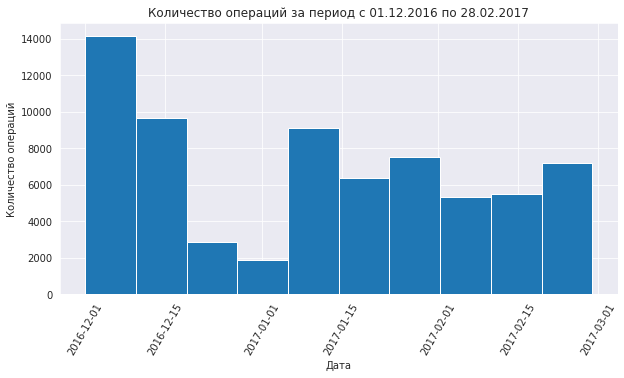

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
data['purchase_date'].hist()


plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel("Дата")
plt.ylabel("Количество операций")
plt.title("Количество операций за период с 01.12.2016 по 28.02.2017")
plt.show()

Пик покупок приходится на декабрь, к началу января продажи резко снижаются,а с середины января и до конца периода придерживаются среднего значения.

На этапе предобработки данных было определено,что в сети 31 магазин. Проверим как присходит распределение по количеству чеков.

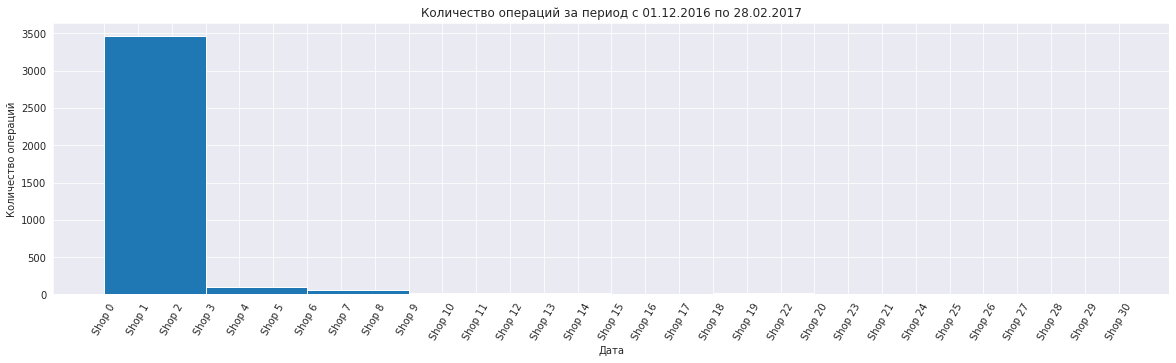

In [35]:
fig, ax = plt.subplots(figsize=(20, 5))
data.groupby('purchase_id')['shop_id'].max().hist()
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel("Дата")
plt.ylabel("Количество операций")
plt.title("Количество операций за период с 01.12.2016 по 28.02.2017")
plt.show()

Проверим как присходит распределение по количеству проданного товара.

In [36]:
groupby_shop = (
    data
    .groupby('shop_id')['quantity'].sum()
    .reset_index()
    .sort_values(by='quantity',ascending=False)
)

groupby_shop['absolute']=groupby_shop['quantity']/groupby_shop['quantity'].sum()*100
display(groupby_shop)

,shop_id,quantity,absolute
0,Shop 0,778109,82.75
23,Shop 3,43115,4.59
27,Shop 6,19565,2.08
25,Shop 4,18410,1.96
1,Shop 1,17889,1.90
12,Shop 2,14534,1.55
11,Shop 19,7225,0.77
6,Shop 14,6942,0.74
29,Shop 8,5005,0.53
28,Shop 7,4496,0.48


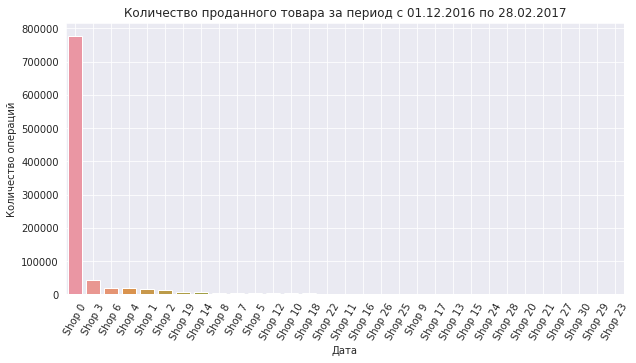

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=data
    .groupby('shop_id')['quantity'].sum()
    .reset_index()
    .sort_values(by='quantity',ascending=False)
    , x="shop_id",y="quantity")
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel("Дата")
plt.ylabel("Количество операций")
plt.title("Количество проданного товара за период с 01.12.2016 по 28.02.2017")
plt.show()

82.75% товара было реализовано Shop 0.
Shop 3 - 4.59% и Shop 6 - 2.08%

Довольно странное распределение продаж, построим график «ящик с усами», для получения более точной картины.

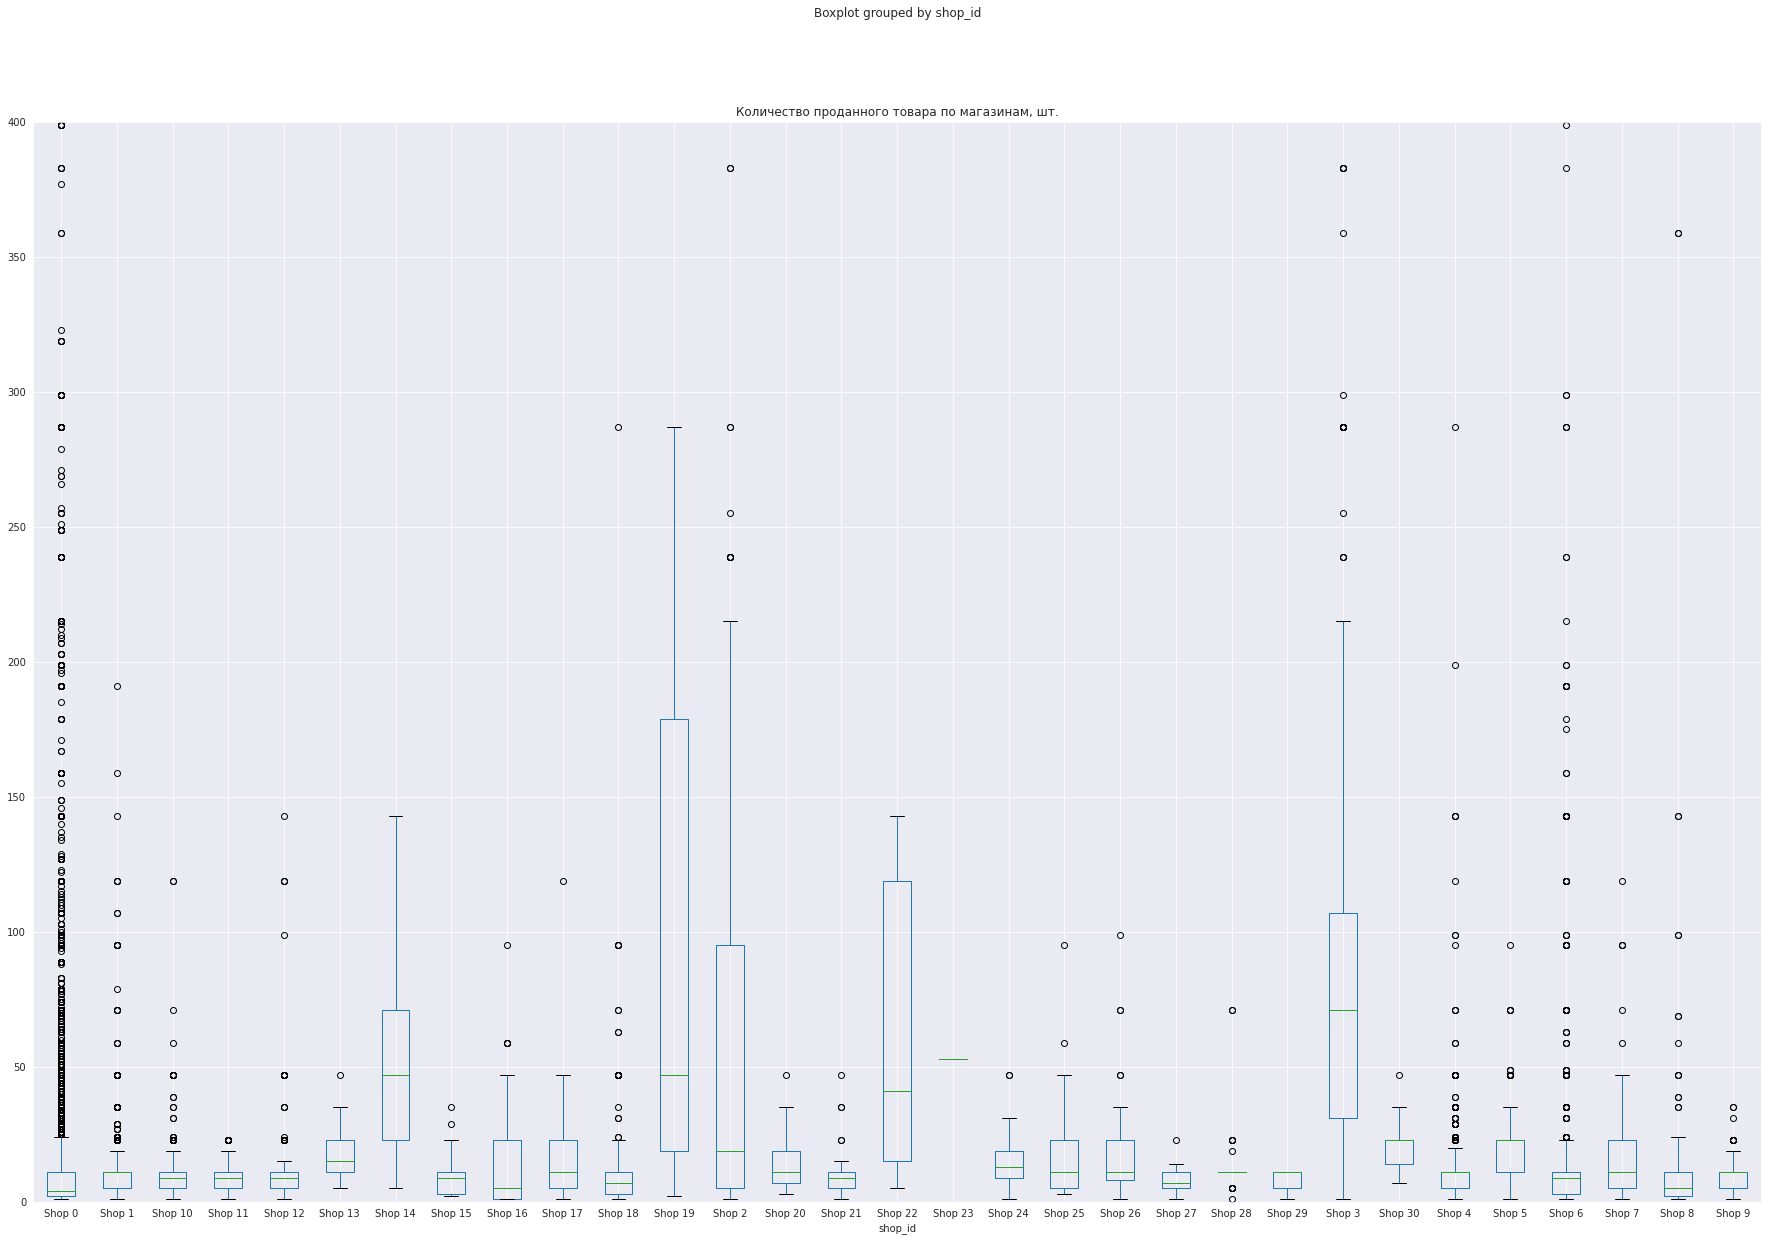

In [38]:
data.boxplot(column='quantity',by='shop_id',figsize=(30,20))
plt.ylim(0, 400)
plt.title("Количество проданного товара по магазинам, шт.")
plt.show()



При изучении распределения по количеству продаваемого товара мы видим,что 0 магазин лидирует по количеству проданного товара, так как по нему проходят чеки с большим количеством товара. 3 магазин имеет меньше выбросов и стабильно продает большее число позиций. 

Проверим показатель количество.

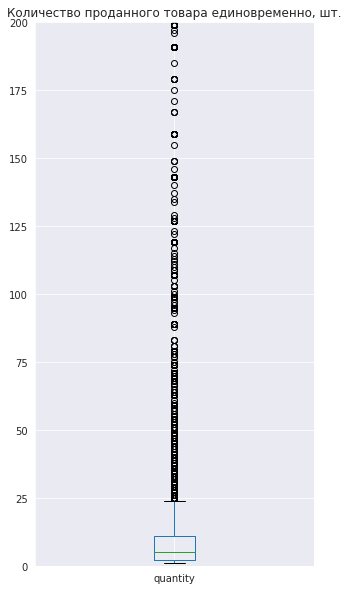

In [39]:
data.boxplot(column='quantity',figsize=(5,10))
plt.ylim(0, 200)
plt.title("Количество проданного товара единовременно, шт.")
plt.show()


Разброс по количеству проданного и возвращенного товара довольно большой. Добавим функцию по удалению выбросов.

In [40]:
def emissions(data, field):
    #функция для отбора выбросов с помощью межквартильного размаха
    before_size = len(data[field])
    q1, q3 = data[field].quantile(0.25), data[field].quantile(0.75)
    iqr = q3-q1
    data = data.query(f'@q1 - 1.5*@iqr < {field} and @q3 + 1.5*@iqr > {field}')
    after_size = len(data[field])
    percent_part = (before_size - after_size)/before_size
    print(q1-1.5*iqr,q3+1.5*iqr)
    print(f'Удалено выбросов: {before_size - after_size} ({percent_part:.1%})')
    return data

In [41]:
data=emissions(data,'quantity')


-11.5 24.5
Удалено выбросов: 4778 (6.9%)


Проверим цену товара на наличие выбросов.

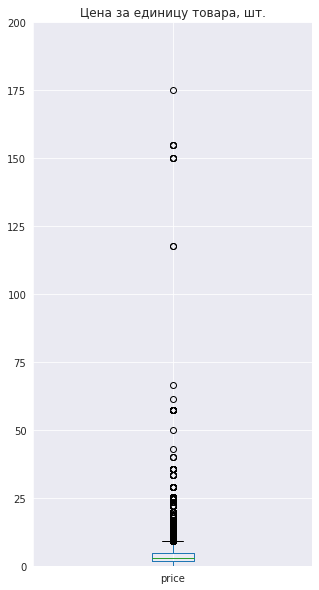

In [42]:
#построим диаграмму "ящик с усами"
data.boxplot(column='price',figsize=(5,10))
plt.ylim(0, 200)
plt.title("Цена за единицу товара, шт.")
plt.show()

In [43]:
#удалим выбросы
data=emissions(data,'price')

-2.9000000000000012 9.180000000000001
Удалено выбросов: 4985 (7.7%)


Определим общее количество покупок и по магазинам.

In [44]:
print("Общее количество чеков по всем магазинам: {:,} штук.".format(len(data.groupby('purchase_id'))))

Общее количество чеков по всем магазинам: 3,351 штук.


Изучим количество чеков по каждому магазину.

In [45]:
data.groupby('shop_id')['purchase_id'].nunique().sort_values(ascending=False)

shop_id
Shop 0     3047
Shop 4       74
Shop 1       68
Shop 6       34
Shop 12      16
Shop 2       15
Shop 8       14
Shop 10      12
Shop 7       10
Shop 3        9
Shop 11       6
Shop 18       6
Shop 5        4
Shop 22       4
Shop 19       4
Shop 9        4
Shop 20       3
Shop 14       3
Shop 13       3
Shop 21       2
Shop 17       2
Shop 16       2
Shop 15       2
Shop 24       1
Shop 25       1
Shop 26       1
Shop 27       1
Shop 28       1
Shop 29       1
Shop 30       1
Name: purchase_id, dtype: int64

По количеству чеков магазин 0 лидирует с большим преимуществом.

Построим график с распределением количества чеков по магазинам.

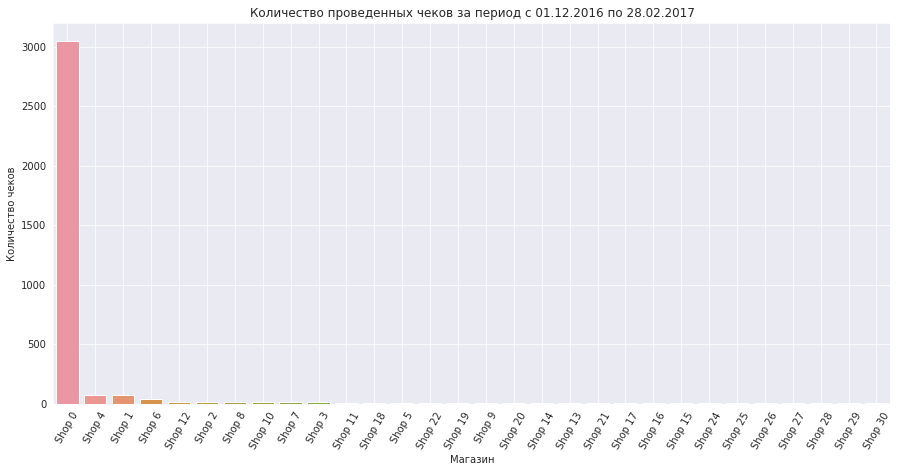

In [46]:

fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(
    data=data
    .groupby('shop_id')['purchase_id'].nunique()
    .sort_values(ascending=False)
    .reset_index()
    , x="shop_id",y="purchase_id"
)
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel("Магазин")
plt.ylabel("Количество чеков")
plt.title("Количество проведенных чеков за период с 01.12.2016 по 28.02.2017")
plt.show()



Определим сумму проданного товара за период.

In [47]:
print("Всего продано товаров за период: {:,} штук.".format(data['quantity'].sum()))


Всего продано товаров за период: 403,648 штук.


Построим график с распределением проданного товара по магазинам.

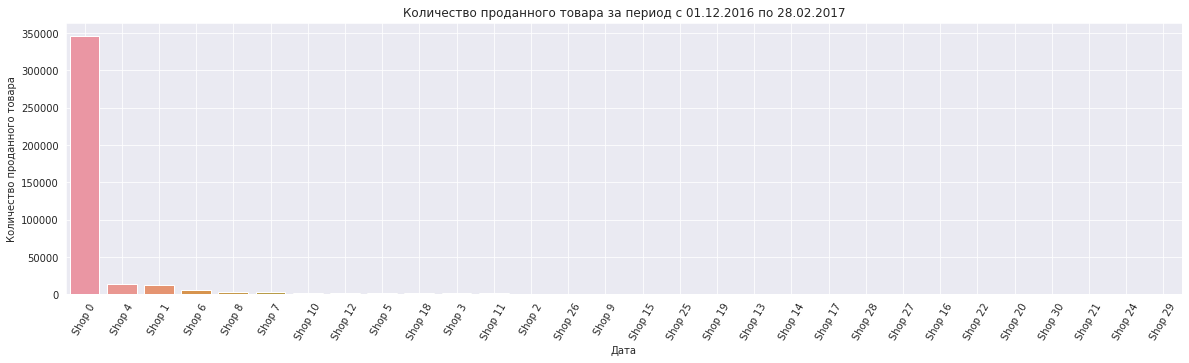

In [48]:

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    data=data
    .groupby('shop_id')['quantity'].sum()
    .reset_index()
    .sort_values(by='quantity',ascending=False)
    , x="shop_id",y="quantity")
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel("Дата")
plt.ylabel("Количество проданного товара")
plt.title("Количество проданного товара за период с 01.12.2016 по 28.02.2017")
plt.show()

In [49]:
data.groupby('shop_id')['quantity'].sum().reset_index().sort_values(by='quantity',ascending=False)

,shop_id,quantity
0,Shop 0,346567
24,Shop 4,14077
1,Shop 1,13184
26,Shop 6,6141
28,Shop 8,3139
27,Shop 7,2936
2,Shop 10,2307
4,Shop 12,2223
25,Shop 5,2153
10,Shop 18,1407


Посчитаем общее количество идентифицированных покупателей.

In [50]:
print("Общее количество идентифицированных покупателей за период: {:,} человек.".format(data['customer_id'].nunique()))

Общее количество идентифицированных покупателей за период: 1,582 человек.


In [51]:
data.groupby('shop_id')['customer_id'].nunique().reset_index().sort_values(by='customer_id',ascending=False)

,shop_id,customer_id
0,Shop 0,1419
24,Shop 4,41
1,Shop 1,37
4,Shop 12,10
28,Shop 8,10
2,Shop 10,8
27,Shop 7,7
12,Shop 2,7
3,Shop 11,5
10,Shop 18,5


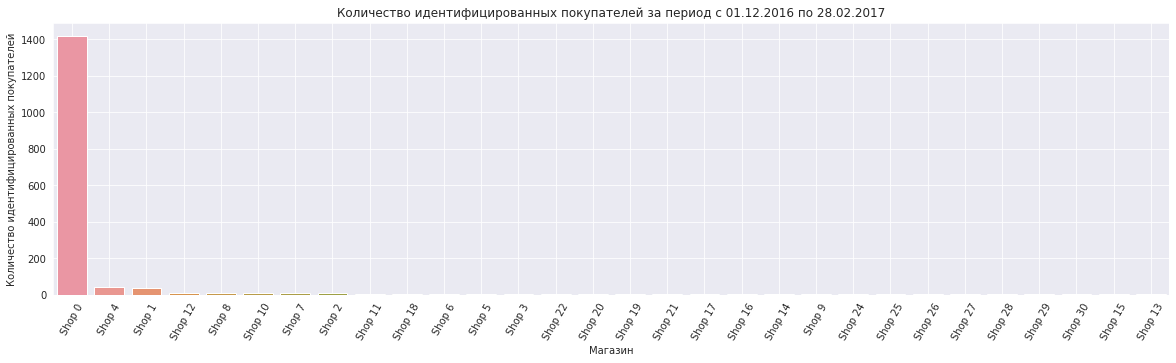

In [52]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(
    data=data
    .groupby('shop_id')['customer_id'].nunique()
    .reset_index()
    .sort_values(by='customer_id',ascending=False)
    , x="shop_id",y="customer_id")
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel("Магазин")
plt.ylabel("Количество идентифицированных покупателей")
plt.title("Количество идентифицированных покупателей за период с 01.12.2016 по 28.02.2017")
plt.show()

Добавим столбец с суммой покупки.

In [53]:
data['sum']=data['quantity']*data['price']

Проверим сумму покупки на наличие выбросов и построим "ящик с усами".

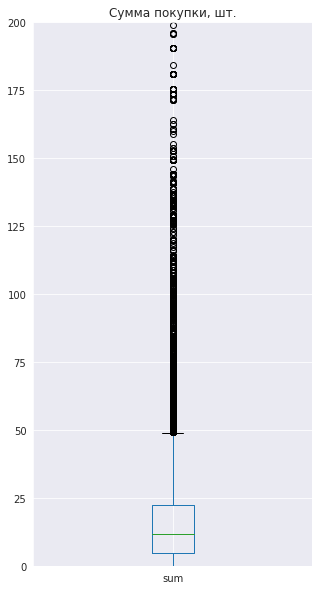

In [54]:
#построим диаграмму "ящик с усами"
data.boxplot(column='sum',figsize=(5,10))
plt.ylim(0, 200)
plt.title("Сумма покупки, шт.")
plt.show()

Так как проверки статистических гипотез сильно чувствительны к выбросам избавимся от выбросов по стоимости позиции.

In [55]:
data=emissions(data,'sum')

-21.695 48.825
Удалено выбросов: 3344 (5.6%)


Создадим таблицу с группировой чекам и магазинам.

In [56]:
data_by_shop=data.pivot_table(
    index=['shop_id','purchase_id',],
    values=['customer_id','quantity','sum','loyalty_program','month'],
    aggfunc={'customer_id':np.unique,'quantity':sum,'sum':sum,'loyalty_program':max,'month':max}
).reset_index()

In [57]:
display(data_by_shop)

,shop_id,purchase_id,customer_id,loyalty_program,month,quantity,sum
0,Shop 0,536365,23529,1,12,32,173.95
1,Shop 0,536366,23529,1,12,10,19.75
2,Shop 0,536367,18726,0,12,36,160.62
3,Shop 0,536368,18726,0,12,5,31.35
4,Shop 0,536369,18726,0,12,2,13.20
...,...,...,...,...,...,...,...
3246,Shop 8,543822,18186,0,2,117,255.64
3247,Shop 9,536971,18458,0,12,55,130.48
3248,Shop 9,541267,18458,0,1,133,399.76
3249,Shop 9,543214,18458,0,2,41,149.65


**Вывод:**

При изучении датасета был определен,анализируемый период данных.

Он составил **89 дней.**

**С 01.12.2016 по 28.02.2017.**

Пик покупок приходится на декабрь, к началу января продажи резко снижаются,а с середины января и до конца периода придерживаются среднего значения.

Была выполнена проверка датасета на наличие выбросов, после чего были удалены:

- **данные по количеству товара:**
удалено : 4778 (6.9%)

- **данные по цене товара:**
удалено : 4985 (7.7%)

- **данные по сумме чека:**
удалено : 3344 (5.6%)

In [58]:
print("После удаления выбросов количество проданного товара по всем магазинам составило: {:,} штук".format(data['quantity'].sum()))

После удаления выбросов количество проданного товара по всем магазинам составило: 346,572 штук


Основная часть товара была продана со следующим распределением по магазинам:

In [59]:
groupby_shop = (
    data
    .groupby('shop_id')['quantity'].sum()
    .reset_index()
    .sort_values(by='quantity',ascending=False)
)

groupby_shop['absolute']=groupby_shop['quantity']/groupby_shop['quantity'].sum()*100
display(groupby_shop.loc[3:])

,shop_id,quantity,absolute
3,Shop 11,1111,0.32
22,Shop 3,726,0.21
12,Shop 2,693,0.20
18,Shop 26,444,0.13
7,Shop 15,423,0.12
29,Shop 9,409,0.12
11,Shop 19,328,0.09
17,Shop 25,269,0.08
8,Shop 16,262,0.08
9,Shop 17,257,0.07


In [60]:
print("Во всех магазинах проведено {:,} чеков.".format(len(data.groupby('purchase_id'))))

Во всех магазинах проведено 3,251 чеков.


In [61]:
print("За весь период во всех магазинах товар приобрели  {:,} идентифицированных покупателей.".format(data['customer_id'].nunique()))

За весь период во всех магазинах товар приобрели  1,554 идентифицированных покупателей.


In [62]:
print(
    "Количество чеков по неидентифицированным покупателям составило:  {:,} чеков."
    .format(data_by_shop.query('customer_id==0')['customer_id'].count())
)

Количество чеков по неидентифицированным покупателям составило:  330 чеков.


Топ 5 магазинов по количеству уникальных идентифицированных покупателей.

In [63]:
data.groupby('shop_id')['customer_id'].nunique().reset_index().sort_values(by='customer_id',ascending=False).head()

,shop_id,customer_id
0,Shop 0,1392
24,Shop 4,41
1,Shop 1,36
4,Shop 12,10
28,Shop 8,10


In [64]:
print("Сумма продаж по магазинам составила: {:,} y.e.".format(round(data['sum'].sum())))

Сумма продаж по магазинам составила: 774,753 y.e.


In [65]:
groupby_shop = (
    data
    .groupby('shop_id')['sum'].sum()
    .reset_index()
    .sort_values(by='sum',ascending=False)
)

groupby_shop['absolute']=groupby_shop['sum']/groupby_shop['sum'].sum()*100
display(groupby_shop.head())

,shop_id,sum,absolute
0,Shop 0,"671,720.87",86.70
24,Shop 4,"24,985.90",3.23
1,Shop 1,"24,004.76",3.10
26,Shop 6,"11,853.42",1.53
28,Shop 8,"6,955.07",0.90


Топ 5 по количеству проведенных чеков, шт.

In [66]:
data.groupby('shop_id')['purchase_id'].nunique().reset_index().sort_values(by='purchase_id',ascending=False).head()

,shop_id,purchase_id
0,Shop 0,2957
24,Shop 4,74
1,Shop 1,66
26,Shop 6,31
4,Shop 12,16


In [67]:
print("Минимальная стоимость чека составила: {:} y.e.".format(data_by_shop['sum'].min()))

Минимальная стоимость чека составила: 0.0 y.e.


Предположим, что данный товар выдается бесплатно в дополнение к какой-то покупке.

In [68]:
print("Максимальная стоимость чека составила: {:,} y.e.".format(round(data_by_shop['sum'].max())))

Максимальная стоимость чека составила: 2,719 y.e.


Магазин 0 лидирует по всем показателям по сравнению с другими магазинами.

Магазин 4 и 1 занимают 2 и 3 места по всем показателям.

6 магазин на 4 месте по количеству проданного товара, выручке и количеству проведенных чеков.

12 магазин на 4 месте по количеству уникальных идентифицированных покупателей и на 5 месте по количеству проведенных чеков.

8 магазин занимает 5 место по количеству проданного товара, выручке и количеству уникальных идентифицированных покупателей.

В таблицу были добавлены дополнительные колонки с указанием месяца покупки, стоимости покупки.

Также была создана таблица data_by_shop с группировкой данных по магазинам и по чекам для проведения дальнейшего исследования.

## Исследовательский анализ данных.
<a id=step_three></a>

0 магазин заметно отличается от остальных точек, поэтому его будем рассматривать отдельно.

In [69]:
display(data_by_shop)

,shop_id,purchase_id,customer_id,loyalty_program,month,quantity,sum
0,Shop 0,536365,23529,1,12,32,173.95
1,Shop 0,536366,23529,1,12,10,19.75
2,Shop 0,536367,18726,0,12,36,160.62
3,Shop 0,536368,18726,0,12,5,31.35
4,Shop 0,536369,18726,0,12,2,13.20
...,...,...,...,...,...,...,...
3246,Shop 8,543822,18186,0,2,117,255.64
3247,Shop 9,536971,18458,0,12,55,130.48
3248,Shop 9,541267,18458,0,1,133,399.76
3249,Shop 9,543214,18458,0,2,41,149.65


Сравним стоимость среднего чека по покупкам Клиентов, участвующих в программе лояльности и нет.

По 0 магазину.

In [70]:
#оставим данные только по 0 магазину, сгруппировав Клиентов по участию в программе лояльности.
#Выведем сумму проданного товара, выручку, средний чек.
data_shop_0=(
    data_by_shop
    .query('shop_id=="Shop 0"')
    .pivot_table(index=['loyalty_program'],values=['purchase_id','sum','quantity'],
             aggfunc={'purchase_id':'count','quantity':sum,'sum':[sum,np.mean,],})
                 .reset_index()
                 .set_axis(['loyalty_program','number_of_checks','quantity','average_check','revenue'],axis='columns'))

#добавим абсолютные показатели по количеству проведенных чеков,проданного товара и выручке.
data_shop_0['percent_purchase']=data_shop_0['number_of_checks']/data_shop_0['number_of_checks'].sum()*100
data_shop_0['percent_quantity']=data_shop_0['quantity']/data_shop_0['quantity'].sum()*100
data_shop_0['percent_revenue']=data_shop_0['revenue']/data_shop_0['revenue'].sum()*100

#добавим показатель, который будет отражать зависимость между категорией по программе
##лояльности и показателей количество проданного товара и выручки.
data_shop_0['bound_quantity']=data_shop_0['percent_quantity']/data_shop_0['percent_purchase']
data_shop_0['bound_revenue']=data_shop_0['percent_revenue']/data_shop_0['percent_purchase']

display(data_shop_0)

,loyalty_program,number_of_checks,quantity,average_check,revenue,percent_purchase,percent_quantity,percent_revenue,bound_quantity,bound_revenue
0,0,1972,212293,240.68,"474,618.86",66.69,70.87,70.66,1.06,1.06
1,1,985,87273,200.10,"197,102.02",33.31,29.13,29.34,0.87,0.88


По 0 магазину в программе лояльности участвуют 33.31% Клиентов.

In [71]:
print(
    "Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на {} %"
    .format(round(
        (data_shop_0.loc[0,'average_check']-data_shop_0.loc[1,'average_check'])
        /data_shop_0.loc[0,'average_check']*100)))

Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на 17 %


Визуализируем зависимость количества проданного товара от участия Клиентов в программе лояльности по 0 магазину.

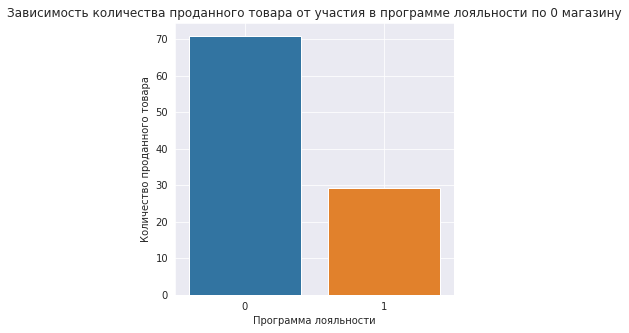

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.barplot(
    data=data_shop_0
    , x="loyalty_program",y="percent_quantity")
plt.grid(True)

plt.xticks(rotation=0)
plt.xlabel("Программа лояльности")
plt.ylabel("Количество проданного товара")
plt.title("Зависимость количества проданного товара от участия в программе лояльности по 0 магазину")
plt.show()

Проверим по остальным магазинам.

In [73]:
data_shop_other=(
    data_by_shop
    .query('shop_id!="Shop 0"')
    .pivot_table(index=['loyalty_program'],values=['purchase_id','sum','quantity'],
             aggfunc={'purchase_id':'count','quantity':sum,'sum':[sum,np.mean,],})
                 .reset_index()
                 .set_axis(['loyalty_program','number_of_checks','quantity','average_check','revenue',],axis='columns'))

data_shop_other['percent_purchase']=data_shop_other['number_of_checks']/data_shop_other['number_of_checks'].sum()*100
data_shop_other['percent_quantity']=data_shop_other['quantity']/data_shop_other['quantity'].sum()*100
data_shop_other['bound_quantity']=data_shop_other['percent_quantity']/data_shop_other['percent_purchase']
data_shop_other['percent_quantity']=data_shop_other['quantity']/data_shop_other['quantity'].sum()*100

display(data_shop_other)

,loyalty_program,number_of_checks,quantity,average_check,revenue,percent_purchase,percent_quantity,bound_quantity
0,0,290,46654,351.96,"102,069.53",98.64,99.25,1.01
1,1,4,352,240.74,962.94,1.36,0.75,0.55


Клиенты остальных магазинов практически не участвуют в программе лояльности (их доля составила 1,36%)
Средняя стоимость чека Клиентов,участвующих в программе лояльности меньше на:

In [74]:
print(
    "Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на {} %"
    .format(round(
        (data_shop_other.loc[0,'average_check']-data_shop_0.loc[1,'average_check'])
        /data_shop_other.loc[0,'average_check']*100)))

Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на 43 %


Построим диаграмму зависимости количества проданного товара от участия Клиентов в программе лояльности по остальным магазинам.

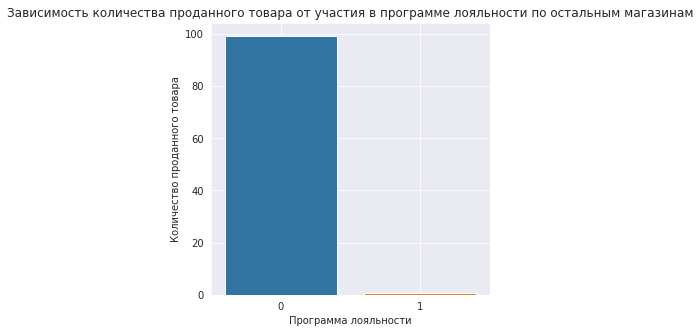

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.barplot(
    data=data_shop_other
    , x="loyalty_program",y="percent_quantity")
plt.grid(True)

plt.xticks(rotation=0)
plt.xlabel("Программа лояльности")
plt.ylabel("Количество проданного товара")
plt.title("Зависимость количества проданного товара от участия в программе лояльности по остальным магазинам")
plt.show()

Определим долю покупок с применением программы лояльности по всем магазинам.

In [76]:
#создадим отдельную таблицу в которой укажем количество покупок с разделением по магазинам и признаку участия в программе лояльности
share_purchase=(
    data_by_shop
    .pivot_table(index='shop_id',columns='loyalty_program', aggfunc='count')
    .reset_index()  
)

#уберем лишние столбцы
share_purchase=share_purchase.loc[:,['shop_id','purchase_id']]

#переименуем колонки
share_purchase=(
    share_purchase
    .set_axis(['shop_id','purchase_without_loyality','purchase_with_loyality'],axis='columns')
)

#уберем пропуски
share_purchase=share_purchase.fillna(0)
#создадим колонку с общим количеством покупок
share_purchase['all_purchase']=share_purchase['purchase_with_loyality']+share_purchase['purchase_without_loyality']
    
    
#добавим долю покупок
share_purchase['share']=share_purchase['purchase_with_loyality']/share_purchase['all_purchase']*100
    
    
display(share_purchase.query('share>0'))

,shop_id,purchase_without_loyality,purchase_with_loyality,all_purchase,share
0,Shop 0,"1,972.00",985.00,"2,957.00",33.31
11,Shop 19,2.00,1.00,3.00,33.33
20,Shop 28,0.00,1.00,1.00,100.00
28,Shop 8,12.00,2.00,14.00,14.29


Построим диаграмму, на которой будет отражена доля покупок с применением программы лояльности по магазинам.

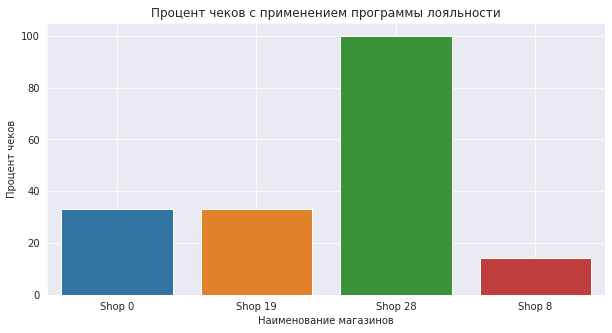

In [77]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    data=share_purchase
    .query('share>0')
    , x="shop_id",y="share")
plt.grid(True)

plt.xticks(rotation=0)
plt.xlabel("Наименование магазинов")
plt.ylabel("Процент чеков")
plt.title("Процент чеков с применением программы лояльности")
plt.show()

Посмотрим, как покупки по программе лояльности распределяются по месяцам.

Text(0.5, 0, 'Месяц')

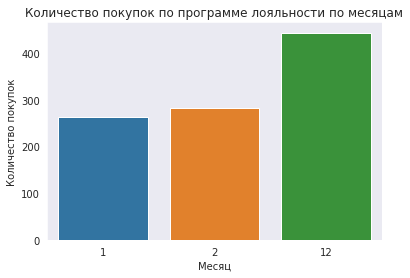

In [78]:
ax = sns.barplot(x="month", y="purchase_id", data=data_by_shop
                 .query('loyalty_program==1')
                 .pivot_table(index=['month'], values='purchase_id', aggfunc='count')
                 .reset_index())
plt.title("Количество покупок по программе лояльности по месяцам")
plt.ylabel("Количество покупок")
plt.xlabel("Месяц")


Проверим удержание Клиентов , которые участвуют в программе лояльности и нет.

Создадим функцию,которая создаст таблицу с пользовательскими профилями Клиентов.

In [79]:
# функция для создания пользовательских профилей

def get_profiles(data):

    # находим параметры первых посещений
    profiles = (
        data.sort_values(by=['customer_id', 'purchase_date'])
        .groupby('customer_id')
        .agg(
            {
                'purchase_date': 'first',
                'shop_id': 'first',
                'loyalty_program':'last',
                'sum':sum
            }
        )
        .rename(columns={'purchase_date': 'first_purchase'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_purchase']).dt.date
    profiles['month'] = pd.to_datetime(profiles['first_purchase']).dt.month

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'shop_id'])
        .agg({'customer_id': 'nunique'})
        .rename(columns={'customer_id': 'customer_users'})
        .reset_index()
    )
    
    # стоимость привлечения органических пользователей равна нулю
    profiles['sum'] = profiles['sum'].fillna(0)

    
    return profiles

In [80]:
# функция для расчёта удержания

def get_retention(
    profiles,
    data,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец loyalty_program в передаваемый dimensions список
    dimensions = ['loyalty_program'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        data[['customer_id', 'purchase_date']], on='customer_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['purchase_date'] - result_raw['first_purchase']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='customer_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'customer_id': 'nunique'})
            .rename(columns={'customer_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['purchase_date'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [81]:
# функция для сглаживания датафрейма
def filter_data(df,window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

# создаем функцию для создания графика удержания
def plot_retention(retention, retention_history, horizon, window = 7):
    
    # задаем сетку отрисовки графкиков
    plt.subplots(figsize = (15, 20))
    
    # проверим размер индекса - если в нем только один столбец loyalty_program, 
    # то добавим еще один - иначе функция будет ломаться

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users' 
        retention = retention.reset_index().set_index(['cohort', 'loyalty_program']) 
    
    # удалим колонки, которые нам не потребуются, а для истории оставляем только нужный lifetime
    retention = retention.drop(columns = ['cohort_size', 0]) 
    retention_history = retention_history.drop(columns = ['cohort_size'])[[horizon - 1]]
    
    # первый график - кривые удержание для Клиентов,участвующих в программе лояльности
    ax1 = plt.subplot(4,1,1)
    retention.query('loyalty_program == 1').droplevel('loyalty_program').T.plot(grid = True, ax = ax1)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('Lifetime')
    plt.title('Удержание Клиентов участвующих в программе лояльности')  
    
    # второй график - кривые для Клиентов,неучаствующих в программе лояльности
    ax2 = plt.subplot(4,1,2,sharey = ax1)
    retention.query('loyalty_program == 0').droplevel('loyalty_program').T.plot(grid = True, ax = ax2)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlabel('Lifetime')
    plt.title('Удержание Клиентов неучаствующих в программе лояльности')
  
    # третий график - динамика изменения удержания для Клиентов,участвующих в программе лояльности
    ax3 = plt.subplot(4, 1, 3)
    # в колонки сводной таблицы для графиков попадут все колонки индекса, кроме даты и признака для Клиентов,участвующих в программе лояльности
    columns = [name for name in retention_history.index.names if name not in ['purchase_date','loyalty_program']] 
    filtered_data =retention_history.query('loyalty_program == 1').pivot_table(index = 'purchase_date', columns = columns, values = horizon - 1, aggfunc = 'mean')               
    filter_data(filtered_data, window).plot(grid = True, ax = ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания Клиентов участвующих в программе лояльности на {}-й день'.format(horizon))
    plt.legend(bbox_to_anchor=(1, 1))
    
    # четвертый график - динамика изменения удержания для Клиентов,неучаствующих в программе лояльности
    ax4 = plt.subplot(4, 1, 4, sharey = ax3)
    filtered_data = retention_history.query('loyalty_program == 0').pivot_table(index = 'purchase_date', columns = columns, values = horizon - 1, aggfunc = 'mean')
    filter_data(filtered_data, window).plot(grid = True, ax = ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания Клиентов неучаствующих в программе лояльности на {}-й день'.format(horizon))   
    
    
    # иногда графики могут накладываться друг на друга
    # чтобы этого избежать - используем tight_layout
    plt.tight_layout() 
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

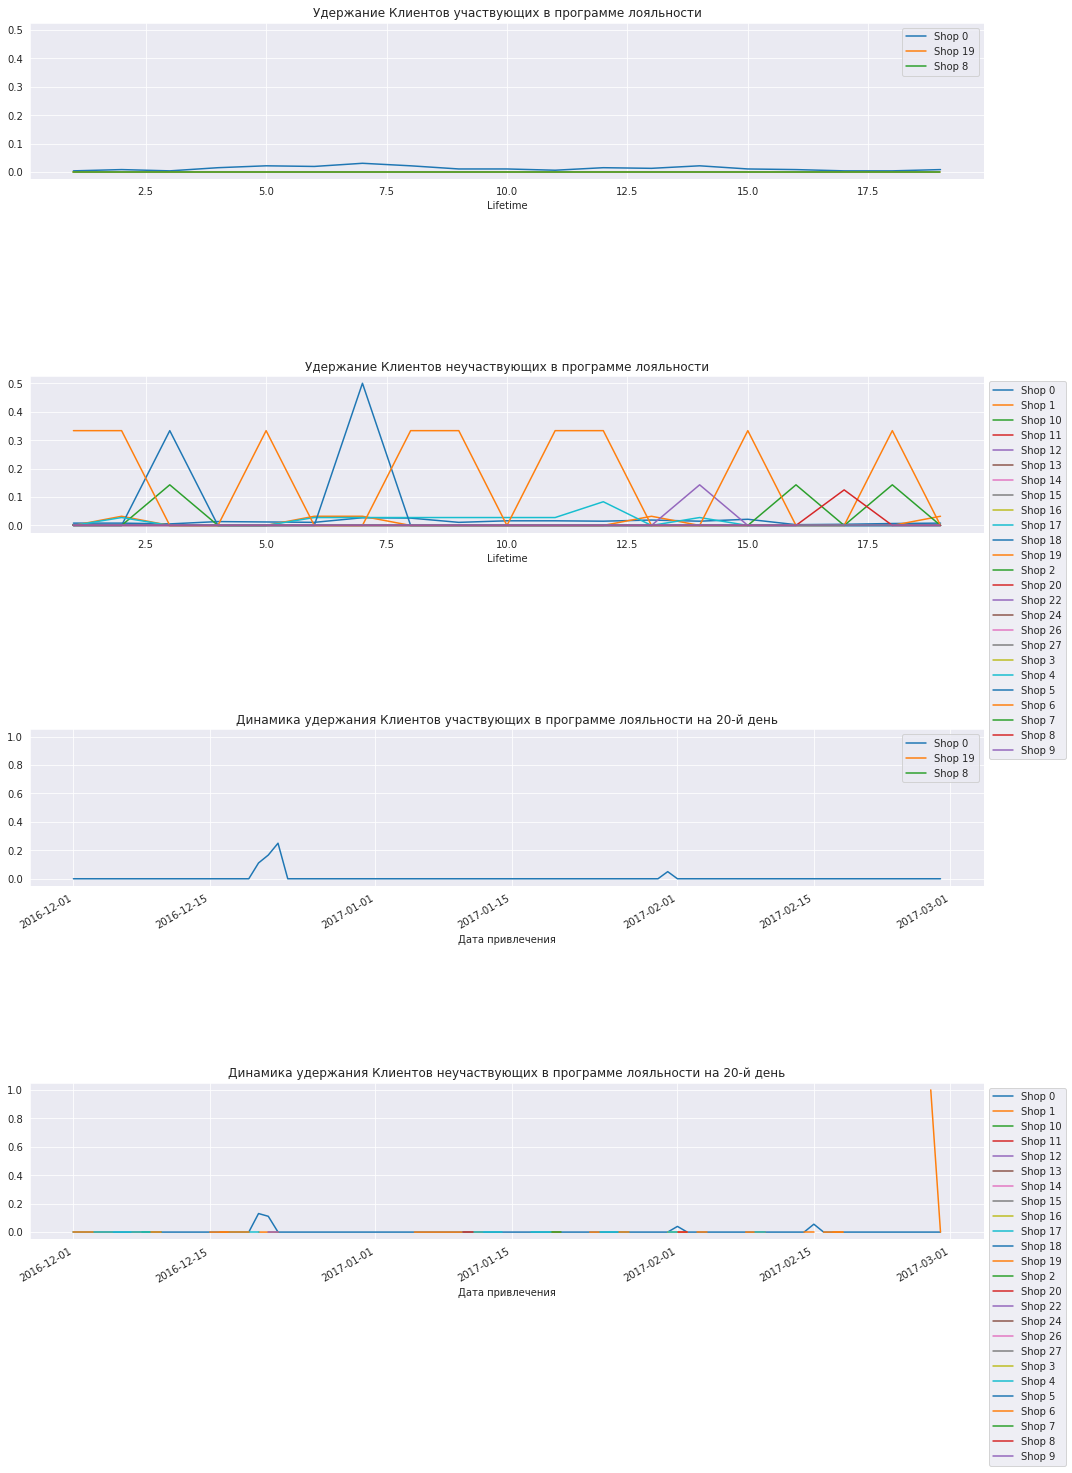

In [82]:
#создаем таблицу с профилями пользователей
profiles=get_profiles(data)
#добавляем признак shop_id
dimensions = ['shop_id']  

observation_date = datetime(2017, 2, 28).date()
horizon_days = 20

retention_raw, retention_grouped, retention_history = get_retention(profiles, data, observation_date, horizon_days, dimensions = dimensions)


plot_retention(retention_grouped, retention_history, horizon_days, window = 1)



Исходя из построенных мы можем предположить, что программа лояльности работает не эффективно и следует пересмотреть ее условия, так как удержание Клиентов неучаствующих в программе лояльности выше, чем у Клиентов, приобретающие товары по программе лояльности.

**Вывод:**

`В рамках исследования были изучены показатели:`

- средняя стоимость чека;
- доля чеков с применением программы лояльности и без;
- количество совершенных покупок с применением программы лояльности по месяцам.

**Показатели для 0 магазина**:

`с применением программы лояльности:`
- средний чек 200.10 y.e.;
- процент покупок 33,31%;

`без применения программы лояльности:`
- средний чек 240.68 y.e.;
- процент покупок 66,69%;


**Показатели для всех магазинов,кроме 0**:

`с применением программы лояльности:`
- средний чек 240.74 y.e.;
- процент покупок 1,36%;

`без применения программы лояльности:`
- средний чек 351.96 y.e.;
- процент покупок 98,64%;



В программе лояльности участвуют Клиенты 0,8,19 и 28 магазинов.

Основная часть Клиентов по программе лояльности приходится на 0 магазин,так как количество операций по другим магазинам намного меньше и распределяется следующим образом:

In [83]:
display(share_purchase.query('share>0'))

,shop_id,purchase_without_loyality,purchase_with_loyality,all_purchase,share
0,Shop 0,"1,972.00",985.00,"2,957.00",33.31
11,Shop 19,2.00,1.00,3.00,33.33
20,Shop 28,0.00,1.00,1.00,100.00
28,Shop 8,12.00,2.00,14.00,14.29


In [84]:
print(
    "Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на {} %"
    .format(round(
        (data_shop_0.loc[0,'average_check']-data_shop_0.loc[1,'average_check'])
        /data_shop_0.loc[0,'average_check']*100)))

Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на 17 %


После проверки удержания Клиентов,участвующих в программе лояльности и нет. 

Можно предположить,что программа лояльности работает не эффективно, так как динамика удержания Клиентов неучаствующих в программе лояльности хоть и нестабильна, но значительно выше, чем у Клиентов,участвующих в программе лояльности.

Динамика Клиентов,участвующих и неучаствующих в программе лояльности на 20 день находится примерно на одном уровне.

## Проверка гипотез.
<a id=step_four></a>

После проведения исследования было отмечено,что основная часть Клиентов,участвующих в программе лояльности приходится на 0 магазин.
В связи с этим скорректируем гипотезы следующим образом:

- cредний чек по покупкам Клиентов `0 магазина` ,участвующим в программе лояльности равен среднему чеку остальных Клиентов;
- количество купленного товара Клиентов `0 магазина`,участвующих в программе лояльности
равно количеству товара приобретенного остальными Клиентами.;

Выполним проверку гипотезы о том,что **средний чек по покупкам Клиентов 0 магазина ,участвующим в программе лояльности не равен среднему чеку остальных Клиентов.** При проверке гипотез будем использовать таблицу `data_by_shop`, так как в ней выполнена группировка по чекам.

Сформулируем 0 и альтернативную гипотезы:
- H0 - Средний чек по покупкам Клиентов 0 магазина,участвующим в программе лояльности равен среднему чеку остальных Клиентов.
- H1 - Средний чек по покупкам Клиентов 0 магазина,участвующим в программе лояльности равен среднему чеку остальных Клиентов.

In [85]:
print("Стоимость среднего чека по 0 магазину.")
display(data_shop_0[['loyalty_program','average_check']])

Стоимость среднего чека по 0 магазину.


,loyalty_program,average_check
0,0,240.68
1,1,200.10


In [86]:
results = st.ttest_ind(data_by_shop.query('shop_id=="Shop 0" and loyalty_program==1')['sum'],
data_by_shop.query('shop_id=="Shop 0" and loyalty_program==0')['sum'],equal_var=False)
alpha=0.05
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Средний чек по покупкам Клиентов,участвующим в программе лояльности не равен среднему чеку остальных Клиентов.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Средний чек по покупкам Клиентов,участвующим в программе лояльности равен среднему чеку остальных Клиентов.") 

p-значение:  4.123481381905511e-06
Отвергаем нулевую гипотезу.
Средний чек по покупкам Клиентов,участвующим в программе лояльности не равен среднему чеку остальных Клиентов.


Выполним проверку гипотезы о том,что
**количество купленного товара Клиентов 0 магазина,участвующих в программе лояльности
равно количеству товара приобретенного остальными Клиентами.** 

При проверке гипотез будем использовать таблицу `data`, так как в ней не выполнена группировка по чекам и информация о позициях в чеке более развернутая.

Сформулируем 0 и альтернативную гипотезы:
- H0 - Количество купленного товара Клиентов 0 магазина,участвующих в программе лояльности
равно количеству товара приобретенного остальными Клиентами.
- H1 - Количество купленного товара Клиентов 0 магазина,участвующих в программе лояльности
не равно количеству товара приобретенного остальными Клиентами.

In [87]:
print("Количество проданного товара в 0 магазине.")
display(data_shop_0[['loyalty_program','quantity']])

Количество проданного товара в 0 магазине.


,loyalty_program,quantity
0,0,212293
1,1,87273


In [88]:
results = st.ttest_ind(data.query('shop_id=="Shop 0" and loyalty_program==1')['quantity'],
data.query('shop_id=="Shop 0" and loyalty_program==0')['quantity'],equal_var=False)
alpha=0.05
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
    print("Количество купленного товара Клиентов 0 магазина,"
          "участвующих в программе лояльности не равно количеству товара приобретенного остальными Клиентами.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")
    print("Количество купленного товара Клиентов 0 магазина,"
          "участвующих в программе лояльности равно количеству товара приобретенного остальными Клиентами.") 

p-значение:  9.549512612509005e-24
Отвергаем нулевую гипотезу.
Количество купленного товара Клиентов 0 магазина,участвующих в программе лояльности не равно количеству товара приобретенного остальными Клиентами.


**Вывод:**

При проведении исследования были отвергнуты гипотезы о том, что:

- cредний чек по покупкам Клиентов `0 магазина` ,участвующим в программе лояльности равен среднему чеку остальных Клиентов;
- количество купленного товара Клиентов `0 магазина`,участвующих в программе лояльности.

Следовательно мы можем предположить,что средний чек и количество продаваемого товара отличаются по участвующим и неучаствующим в программе лояльности Клиентам.


## Общий вывод.
<a id=conclusion_id></a>


В рамках исследования был произведен анализ данных о покупках в магазине строительных материалов «Строили, строили и наконец построили», полученных из файлов retail_dataset.csv и product_codes.csv. 

В первоначальной таблице product зафиксировано 9700 цен на товары/услуги в таблице retail содержится 104837 операций.

На этапе предобработки данных были приведены в соответствие наименования колонок и типы данных.

При изучении информации в таблице product было обнаружено,что основная часть артикулов начинается с цифровых значений,а часть с текстовых.
Была выполнена проверка предположения о том,что позиции с текстовым значением - это признак операции и создан для того,чтобы отражать не продажу товаров, а почтовые расходы, таможенные платежи, комиссию банка, подарки Клиентам, технические операции,связанные с ошибкой и прочие корректировки. Частично теория о признаке операции по номеру артикула подтвердилась, из датасета были удалены все артикулы, где количество товара равно 0 или меньше 1,их часть составила:

In [89]:
display("{:,.2%} данных.".format((len(product)-len(product_new))/len(product)))

'2.70% данных.'

Также,было отмечено,что по одному товару в таблице  product указаны разные цены,поэтому при расчетах были применены цены по значению медианы.

In [90]:
display("При изучении таблицы retail было выявлено 1033 дубликатов,которые были удалены из таблицы и составили: {:,.2%} данных.".format((len(retail)-len(retail_new))/len(retail)))

'При изучении таблицы retail было выявлено 1033 дубликатов,которые были удалены из таблицы и составили: 1.43% данных.'

На следующем шаге была создана таблица data, в которой содержатся все операции по таблице retail и соответствующая им цена (price) из таблицы product. После объединения 2 таблиц из таблицы data были удалены 0 и отрицательные значения,они составили 32,85% информации таблицы data. Процент удаленных данных из датасета довольно велик,но при 0 количестве товара умноженном на цену мы получим нулевое значение,которое приведет к искажению расчетов.

На следующем шаге были удалены выбросы по показателям:

- `количество товара,`
- `цена товара,`
- `сумма чека.`

In [91]:
display(
    "В результате удаления нулевых и отрицательных значений"
    "и выбросов из таблицы data было удалено: {:,.2%} данных."
    .format((len(data_old)-len(data))/len(data_old))
)

'В результате удаления нулевых и отрицательных значенийи выбросов из таблицы data было удалено: 45.47% данных.'

Также была создана таблица data_by_shop с группировкой данных по магазинам и по чекам для проведения дальнейшего исследования по чекам.

Анализируемый период составил **89 дней.**

**С 01.12.2016 по 28.02.2017.**

Пик покупок приходится на декабрь, к началу января продажи резко снижаются,а с середины января и до конца периода придерживаются среднего значения.

In [92]:
print("Количество проданного товара по всем магазинам составило: {:,} штук".format(data['quantity'].sum()))

Количество проданного товара по всем магазинам составило: 346,572 штук


Основная часть товара была продана 0 магазином. Поэтому в исследовании его показатели рассматривались отдельно.

In [93]:
groupby_shop = (
    data
    .groupby('shop_id')['quantity'].sum()
    .reset_index()
    .sort_values(by='quantity',ascending=False)
)

groupby_shop['absolute']=groupby_shop['quantity']/groupby_shop['quantity'].sum()*100
display(groupby_shop.head())

,shop_id,quantity,absolute
0,Shop 0,299566,86.44
24,Shop 4,12243,3.53
1,Shop 1,11209,3.23
26,Shop 6,4847,1.40
28,Shop 8,2908,0.84


Магазин **0** лидирует по всем показателям по сравнению с другими магазинами.

Магазин **4 и 1** занимают 2 и 3 места по всем показателям.

**6** магазин на 4 месте по количеству проданного товара, выручке и количеству проведенных чеков.

**12** магазин на 4 месте по количеству уникальных идентифицированных покупателей и на 5 месте по количеству проведенных чеков.

**8** магазин занимает 5 место по количеству проданного товара, выручке и количеству уникальных идентифицированных покупателей.



Были отвергнуты гипотезы о том, что:

- cредний чек по покупкам Клиентов `0 магазина` ,участвующим в программе лояльности равен среднему чеку остальных Клиентов;
- количество купленного товара Клиентов `0 магазина`,участвующих в программе лояльности.

Следовательно мы можем предположить,что средний чек и количество продаваемого товара отличаются по участвующим и неучаствующим в программе лояльности Клиентам.

`В ходу исследования были изучены показатели:`

- средняя стоимость чека;
- доля чеков с применением программы лояльности и без;
- количество совершенных покупок с применением программы лояльности по месяцам.

**Показатели для 0 магазина**:

`с применением программы лояльности:`
- средний чек 200.10 y.e.;
- процент покупок 33,31%;

`без применения программы лояльности:`
- средний чек 240.68 y.e.;
- процент покупок 66,69%;


**Показатели для всех магазинов,кроме 0**:

`с применением программы лояльности:`
- средний чек 240.74 y.e.;
- процент покупок 1,36%;

`без применения программы лояльности:`
- средний чек 351.96 y.e.;
- процент покупок 98,64%;



В программе лояльности участвуют Клиенты 0,8,19 и 28 магазинов.

Основная часть Клиентов по программе лояльности приходится на 0 магазин,так как количество операций по другим магазинам намного меньше и распределяется следующим образом:

In [94]:
display(share_purchase.query('share>0'))

,shop_id,purchase_without_loyality,purchase_with_loyality,all_purchase,share
0,Shop 0,"1,972.00",985.00,"2,957.00",33.31
11,Shop 19,2.00,1.00,3.00,33.33
20,Shop 28,0.00,1.00,1.00,100.00
28,Shop 8,12.00,2.00,14.00,14.29


In [95]:
print(
    "Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на {} %"
    .format(round(
        (data_shop_0.loc[0,'average_check']-data_shop_0.loc[1,'average_check'])
        /data_shop_0.loc[0,'average_check']*100)))

Средняя стоимость чека Клиентов,участвующих в программе лояльности по 0 магазину меньше на 17 %


Текущая программа лояльности "не справляется" с удержанием Клиентов, так как кривая удержания Клиентов неучаствующих в программе лояльности хоть и нестабильна, но значительно выше, чем у Клиентов,участвующих в программе лояльности.

Динамика Клиентов,участвующих и неучаствующих в программе лояльности на 20 день находится примерно на одном уровне.

Следует отметить, что стоимость среднего среднего чека по программе лояльности значительно ниже,чем стоимость среднего чека по Клиентам неучаствующим в программе лояльности. Следовательно товар со скидкой распространяется на более дешевый товар.

Рекомендуется рассмотреть внедрение бонусной программы, которая будет направлена на удержание Клиентов, увеличение количества продаваемого товара и увеличение среднего чека за счет продажи высокомаржинальных товаров.

Вероятно,что внедрение программы лояльности на одинаковых условиях эффективно не для всех магазинов.
Например, для маленьких магазинов,находящихся в удаленности целевая аудитория - это Клиенты,проживающие поблизости и для них будут актуальны иные условия, чем для крупного оптового магазина.